# Analysis of AI and ML Job Listings in the USA


## Installation and Setup

In [60]:
# Standard libraries
import os
import zipfile
from datetime import datetime

# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from wordcloud import WordCloud


In [61]:
!kaggle datasets download -d kanchana1990/ai-and-ml-job-listings-usa

Dataset URL: https://www.kaggle.com/datasets/kanchana1990/ai-and-ml-job-listings-usa
License(s): ODC Attribution License (ODC-By)
 99%|█████████████████████████████████████▊| 1.00M/1.01M [00:00<00:00, 3.40MB/s]
100%|██████████████████████████████████████| 1.01M/1.01M [00:00<00:00, 3.40MB/s]


In [62]:
def unzip_file(zip_file):

    extract_to = os.path.dirname(os.path.abspath(zip_file))
    
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    
    os.remove(zip_file)
    
unzip_file("ai-and-ml-job-listings-usa.zip")

In [63]:
data = pd.read_csv("ai_ml_jobs_linkedin.csv")
data.head()

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
0,AI/ML Engineer,"New York, NY",2024-05-29,Wesper,THE OPPORTUNITY\n\nWesper is looking for a sma...,Over 200 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Internet Publishing
1,Software Engineer - AI/ML Systems,"Redwood City, CA",NaN,Snorkel AI,We're on a mission to democratize AI by buildi...,51 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
2,ML Engineer at 100% Remote,"San Jose, CA",2024-06-01,ELITE MENTE LLC,"Hello ,\n\nHope you are doing well!\n\nPlease ...",Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting
3,Machine Learning Engineer (L4) - Infrastructur...,"Los Gatos, CA",2024-05-19,Netflix,At Netflix our goal is to entertain the world....,Over 200 applicants,Full-time,Not Applicable,Engineering and Information Technology,"Entertainment Providers, Technology, Informati..."
4,Data Scientist / ML Engineer,"Redwood City, CA",NaN,"Paradyme, Inc.",Overview\n\nParadyme Management is a rapidly g...,110 applicants,Full-time,Entry level,Engineering and Information Technology,IT Services and IT Consulting


## Data Exploration and Cleaning



In [64]:
data.shape

(862, 10)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 862 entries, 0 to 861
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              862 non-null    object
 1   location           862 non-null    object
 2   publishedAt        850 non-null    object
 3   companyName        861 non-null    object
 4   description        862 non-null    object
 5   applicationsCount  862 non-null    object
 6   contractType       862 non-null    object
 7   experienceLevel    862 non-null    object
 8   workType           862 non-null    object
 9   sector             859 non-null    object
dtypes: object(10)
memory usage: 67.5+ KB


In [66]:
# Check for missing values
data.isnull().sum()

title                 0
location              0
publishedAt          12
companyName           1
description           0
applicationsCount     0
contractType          0
experienceLevel       0
workType              0
sector                3
dtype: int64

In [67]:
data[data.publishedAt.isnull()]

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
1,Software Engineer - AI/ML Systems,"Redwood City, CA",NaN,Snorkel AI,We're on a mission to democratize AI by buildi...,51 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
4,Data Scientist / ML Engineer,"Redwood City, CA",NaN,"Paradyme, Inc.",Overview\n\nParadyme Management is a rapidly g...,110 applicants,Full-time,Entry level,Engineering and Information Technology,IT Services and IT Consulting
6,Junior Machine Learning Engineer,"Boulder, CO",NaN,HireMeFast LLC,This is a remote position.\n\nDISCLAIMER: This...,26 applicants,Full-time,Entry level,Information Technology,Software Development
31,Machine Learning Engineer (NLP),"San Francisco, CA",NaN,Writesonic,[Full Time] Machine Learning Engineer (NLP) at...,43 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
33,Founding Engineer (AI/ML),United States,NaN,Meetsta,About Meetsta: Meetsta is a dynamic and innova...,Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
271,Machine Learning Engineer,New York City Metropolitan Area,NaN,"Tribal Tech - The Digital, Data & AI Specialists",About the Role\n\nMy client is an engineering-...,Over 200 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Financial Services and Software Development
331,Machine Learning Engineer,"Chicago, IL",NaN,Motion Recruitment Partners LLC,We're looking for a Machine Learning Enigneer ...,Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting
348,AI/ML Engineer(Remote),United States,NaN,NaN,THE OPPORTUNITY\n\n\n\n\nWesper is looking for...,112 applicants,Full-time,Entry level,Engineering and Information Technology,Outsourcing and Offshoring Consulting
448,Machine Learning Engineer,"McLean, VA",NaN,"BYTE Systems, LLC",Candidate MUST possess a TS/SCI clearance with...,Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Information Technology & Services
466,AI Engineer,United States,NaN,Entelligence.AI,Company Description\n\n\n\n\nAt Entelligence.a...,118 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development


In [68]:
data[data.companyName.isnull()]

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
348,AI/ML Engineer(Remote),United States,NaN,NaN,THE OPPORTUNITY\n\n\n\n\nWesper is looking for...,112 applicants,Full-time,Entry level,Engineering and Information Technology,Outsourcing and Offshoring Consulting


In [69]:
data['companyName'].fillna('Unknown Company', inplace=True)

In [70]:
data[data.sector.isnull()]

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
281,Software Engineer (ML),United States,2024-05-31,Hop Labs,THE COMPANY\n\nHop Labs works with organizatio...,118 applicants,Full-time,Entry level,Software Development,NaN
399,"Machine Learning Engineer, Medical Imaging","Indianapolis, IN",2024-04-29,Stealth Startup,"Machine Learning Engineer, Medical Imaging\n\n...",Over 200 applicants,Full-time,Entry level,"Technology, Information and Internet",NaN
746,Machine Learning Scientist,"Pittsburgh, PA",2024-05-20,NOMA AI,NOMA is developing a novel AI platform for hea...,Over 200 applicants,Full-time,Mid-Senior level,Hospitals and Health Care,NaN


In [71]:
data['sector'].fillna('Unknown Sector', inplace=True)

In [72]:
# Check for duplicates
data[data.duplicated(keep=False)]

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
343,Full-Stack Engineer (with ML/AI Exposure),"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",About Us:\n\nWe are a dynamic startup committe...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...
356,Full-Stack Engineer with ML/AI Experience,"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",About the Company:\n\nWe are an innovative tec...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...
371,Senior ML Operations Engineer (MLOps),"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",Company Overview: Welcome to the forefront of ...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...
376,Senior ML Operations Engineer (MLOps),"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",Company Overview: Welcome to the forefront of ...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...
385,Full-Stack Engineer (with ML/AI Exposure),"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",About Us:\n\nWe are a dynamic startup committe...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...
398,Full-Stack Engineer with ML/AI Experience,"San Francisco, CA",2024-04-12,"Unreal Staffing, Inc",About the Company:\n\nWe are an innovative tec...,Be among the first 25 applicants,Full-time,Mid-Senior level,Engineering,Non-profit Organizations and Primary and Secon...


In [73]:
# Drop duplicate rows and reset index
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [74]:
# Export cleaned data for Tableau
data.to_csv('cleaned_data.csv', index=False)

## Exploratory Data Analysis (EDA)


In [75]:
data = pd.read_csv("cleaned_data.csv")
data.head()

,title,location,publishedAt,companyName,description,applicationsCount,contractType,experienceLevel,workType,sector
0,AI/ML Engineer,"New York, NY",2024-05-29,Wesper,THE OPPORTUNITY\n\nWesper is looking for a sma...,Over 200 applicants,Full-time,Mid-Senior level,Engineering and Information Technology,Internet Publishing
1,Software Engineer - AI/ML Systems,"Redwood City, CA",NaN,Snorkel AI,We're on a mission to democratize AI by buildi...,51 applicants,Full-time,Entry level,Engineering and Information Technology,Software Development
2,ML Engineer at 100% Remote,"San Jose, CA",2024-06-01,ELITE MENTE LLC,"Hello ,\n\nHope you are doing well!\n\nPlease ...",Be among the first 25 applicants,Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting
3,Machine Learning Engineer (L4) - Infrastructur...,"Los Gatos, CA",2024-05-19,Netflix,At Netflix our goal is to entertain the world....,Over 200 applicants,Full-time,Not Applicable,Engineering and Information Technology,"Entertainment Providers, Technology, Informati..."
4,Data Scientist / ML Engineer,"Redwood City, CA",NaN,"Paradyme, Inc.",Overview\n\nParadyme Management is a rapidly g...,110 applicants,Full-time,Entry level,Engineering and Information Technology,IT Services and IT Consulting


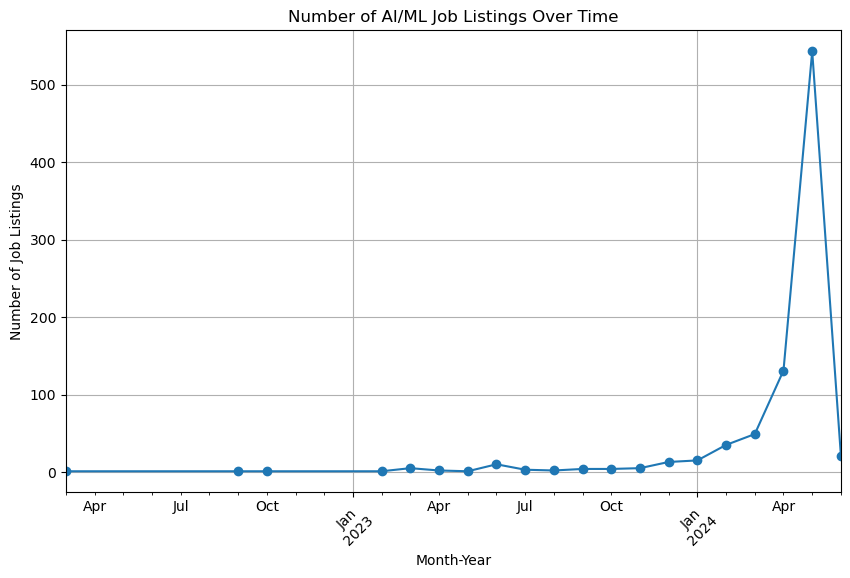

In [76]:
# Convert 'publishedAt' to datetime
data['publishedAt'] = pd.to_datetime(data['publishedAt'], errors='coerce')

# 1. Number of Jobs and Publish Date to Know Seasonal Trends
plt.figure(figsize=(10, 6))
data['month_year'] = data['publishedAt'].dt.to_period('M')
job_counts_by_month = data['month_year'].value_counts().sort_index()
job_counts_by_month.plot(kind='line', marker='o')
plt.title('Number of AI/ML Job Listings Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Number of Job Listings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

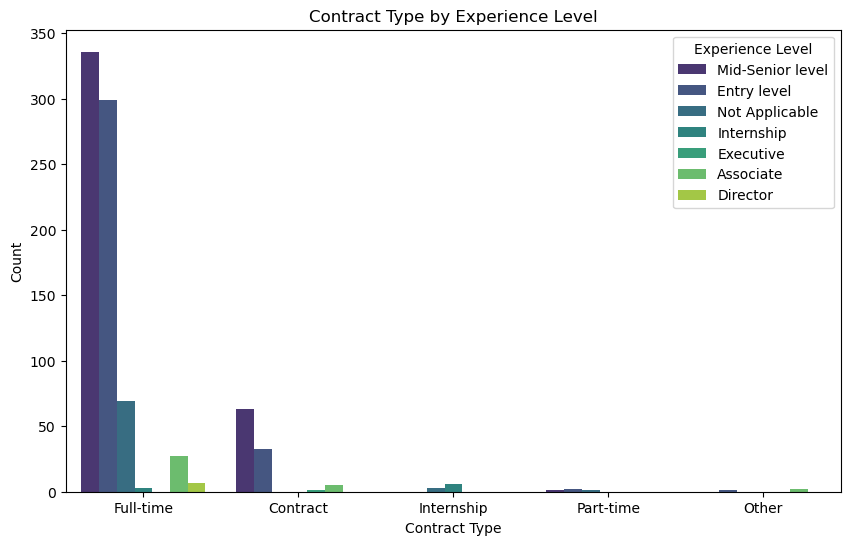

In [77]:
# 2. Bar Chart: `contractType` by `experienceLevel`
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='contractType', hue='experienceLevel', palette='viridis')
plt.title('Contract Type by Experience Level')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Experience Level', loc='upper right')
plt.show()

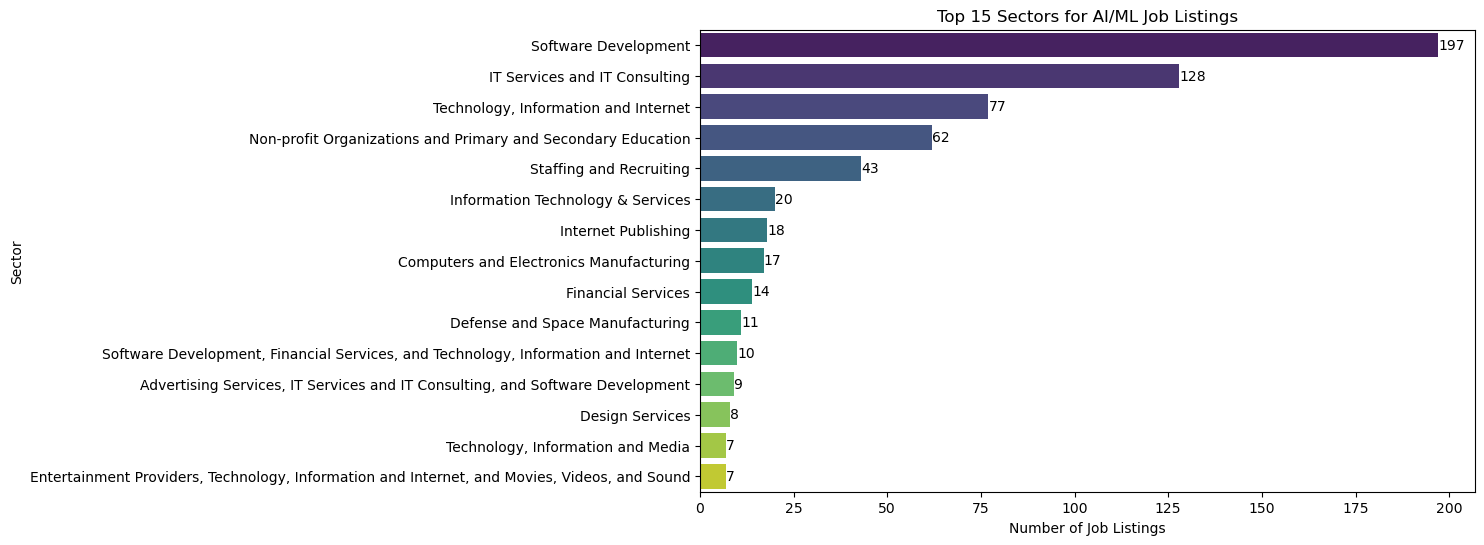

In [78]:
# 3. Top 10 Sectors with Labels
plt.figure(figsize=(10, 6))
top_15_sectors = data['sector'].value_counts().head(15)
sns.barplot(x=top_10_sectors.values, y=top_10_sectors.index, palette='viridis')
plt.title('Top 15 Sectors for AI/ML Job Listings')
plt.xlabel('Number of Job Listings')
plt.ylabel('Sector')
# Add labels on bars
for index, value in enumerate(top_15_sectors.values):
    plt.text(value, index, str(value), ha='left', va='center', color='black')

plt.show()


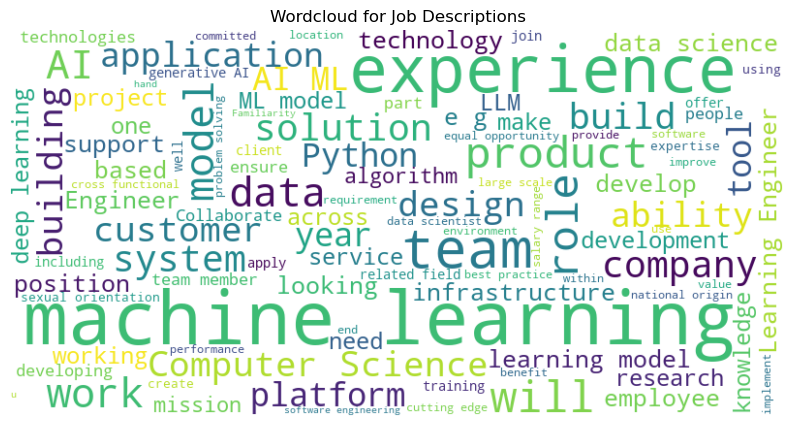

In [79]:
# 4. Wordcloud for Job Descriptions
text = " ".join(description for description in data.description)
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud for Job Descriptions')
plt.show()

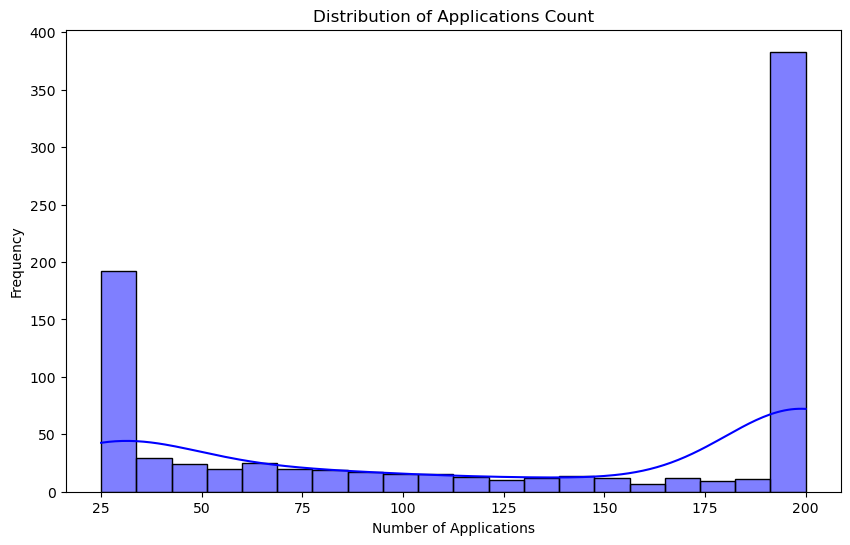

In [80]:
# 5. Bar Chart for `applicationsCount`

# Extract numbers and convert to int
data['applicationsCount_int'] = data['applicationsCount'].str.extract('(\d+)').astype(int)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.title('Distribution of Applications Count')
plt.xlabel('Number of Applications')
plt.ylabel('Frequency')
plt.show()sns.histplot(data['applicationsCount_int'].dropna(), bins=20, kde=True, color='blue')


In [81]:
data.to_csv('cleaned_data.csv', index=False, quoting=1)  # quoting=1 ensures all fields are quoted
